## Monte Carlo Basic

1. Motivation

Monte Carlo primarily utilizes random sampling to generate data and updates strategies based on the generated data. Essentially, it estimates the model's parameters from the data.

2. Method
   
The Monte Carlo algorithm is a `modification` of the `policy iteration` algorithm, where the parts requiring a model (specifically, the State Transition Probability) are replaced by first sampling data and then estimating the model from this data.

The approach involves iterating over each state-actions pairs to generate multiple trajectories/episodes. Then, the expected value of each action is calculated to obtain the action value, and the action with the highest action value is selected as the policy for the current state.

3. Remark
   
There are mainly two differences between Policy Iteration and MC Basic, one is that MC Basic is a model-free algorithm. The another is that in PE step, Policy Iteration calculated state value first, and then calculate action value. But in MC Basic, we directly calculate action value.

<img src = 'MC_Basic.png' alt = 'MCBasic_algorithms' style="width: 700px; height: 350px;" />

In [1]:
import numpy as np
import random
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from GridWorld import GridWorld

c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\callmest\.conda\envs\RBP-TSTL\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
gamma = 0.9 
rows = 10
cols = 10
grid_world = GridWorld(rows, cols, forbiddenAreaNums=10)
grid_world.show()

⬜️⬜️🚫⬜️✅⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️🚫⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️🚫⬜️
⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️🚫
⬜️🚫⬜️⬜️🚫⬜️⬜️⬜️⬜️🚫
⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
🚫⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️⬜️
⬜️⬜️⬜️🚫⬜️⬜️⬜️⬜️⬜️⬜️


In [3]:
# Though in MC Basic the episode length is not fixed, we still need to set a maximum length for each episode to avoid infinite loop
episode_length = 100

state_values = np.zeros(rows*cols) 

# action value
qtable = np.zeros((rows*cols, 5)) 

# MC Basic method is just like policy iteration, we first need a random policy and then improve it
policy = np.eye(5)[np.random.randint(0,5,size=(rows*cols))]

grid_world.show_policy_matirx(policy)

Now policy:
⬇️➡️🔄➡️✅➡️⬅️⬅️➡️⬇️
⬅️⬇️🔄⬆️⬆️⬆️⬆️⬆️⬆️➡️
➡️🔄🔄🔄🔄⬇️⬆️🔄⏫️⬅️
⬇️➡️⬆️🔄⬆️⬆️⬇️🔄⬆️⬅️
➡️⬇️⬆️⬅️⬇️⬅️⬇️➡️⏫️➡️
🔄➡️🔄⏬🔄🔄🔄➡️⬆️⏪
⬆️⏫️⬇️🔄⏫️⬇️⬇️➡️⬇️⏬
⬇️⬅️➡️⬅️➡️⬆️⬆️⬇️➡️➡️
⏬⬅️⬆️➡️⬆️➡️🔄⬆️➡️⬅️
⬇️⬅️⬅️🔄⬅️⬇️⬅️➡️⬇️⬆️


-----------------------------------
q value update start at iteration: 0, threshold: [500.0]
-----------------------------------
q value update start at iteration: 1, threshold: [12143.520219368016]
-----------------------------------
q value update start at iteration: 2, threshold: [22543.528542973465]
-----------------------------------
q value update start at iteration: 3, threshold: [1913.0693811356032]
-----------------------------------
q value update start at iteration: 4, threshold: [1228.3869740794707]
-----------------------------------
q value update start at iteration: 5, threshold: [994.9832340633176]
-----------------------------------
q value update start at iteration: 6, threshold: [736.1169641352474]
-----------------------------------
q value update start at iteration: 7, threshold: [8.100000000000001]
Optimal Policy Found!
Final Policy
Now policy:
➡️➡️⏩️➡️✅⬅️⬅️⬅️⬅️⬅️
➡️➡️➡️⬆️⬆️⬆️⬆️⬆️⬆️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⏫️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬅️⬆️
⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⏫️⬆️
⬆️⬆️⬆️⏫️⬆️⬆️⬆️⬆️⬅

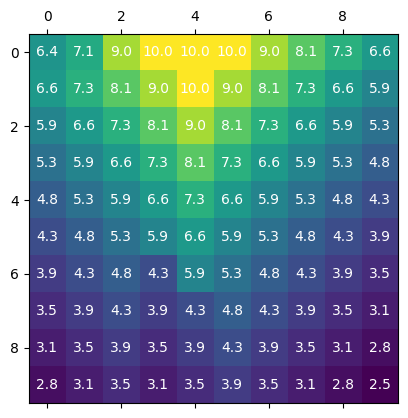

In [4]:
# Perform PE first but use the sampling method to calculate the action value rather than solve the Bellman Equation to obtain state
pre_qtabel = qtable.copy() + 1
# set the threshold to stop the iteration
threshold = 0.001
cut = 0
cut_threshold = 1000

# MC Basic need sample many episodes to update the q value, so we set the episode number for each action
episode_num = 10

while np.sum((pre_qtabel-qtable)**2) > threshold and cut < cut_threshold:
    print('-----------------------------------')
    print(f'q value update start at iteration: {cut}, threshold: [{np.sum((pre_qtabel-qtable)**2)}]')
    pre_qtabel = qtable.copy()

    # PE
    # for each state and action, we generate multiple episodes to calculate the action value
    for i in range(rows*cols):
        for j in range(5):
            # generate multiple episodes
            episode_returns = []
            for _ in range(episode_num):
                episode = grid_world.get_episode_return(
                    now_state=i, 
                    now_action=j,
                    policy=policy,
                    steps=episode_length
                )
                # for each episode, we calculate the return
                # formula：Gt = Rt+1 + gamma*Rt+2 + gamma^2*Rt+3 + ... + gamma^(T-1)*Rt+T
                # q(s,a) = E[Gt|St=s, At=a]
                
                # As the video says, we can calculate the return from the end to the start
                last_reward = episode[-1][2]
                for k in range(episode_length-1, -1, -1):
                    last_reward = episode[k][2] + gamma*last_reward
                
                episode_returns.append(last_reward)
            # update the action value
            action_value = np.mean(episode_returns)
            qtable[i][j] = action_value
    # PI
    # After we get the action value for each state and action, we can update the policy
    # And you may notice that we update the policy when every thing is done, this might be sort of inefficient
    # If we apply the policy improvement method in the loop, we can get the optimal policy faster
    # And this we will do in the future chapters.
    policy = np.eye(5)[np.argmax(qtable, axis=1)]
    cut += 1
print('Optimal Policy Found!')
print('Final Policy')
grid_world.show_policy_matirx(policy)
# according to the Bellman optimality equation, we can get the optimal state value
state_values = np.max(qtable, axis=1)
grid_world.show_state_value(state_values.reshape((rows, cols)))